## 소개 
- 왜 블루팀이 레드팀보다 더 좋은지에 대한 내용
- 출처 : [why is blue is better?](https://www.kaggle.com/verhalenn/why-is-blue-a-better)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('data/LeagueofLegends.csv')

blue / red 승리 합계

In [3]:
print("Blue wins", data.bResult.sum())
print("Red wins", data.rResult.sum())

Blue wins 1987
Red wins 1658


위의 결과를 봤을 때, 블루쪽에 약간의 이점이 있는 것으로 보임.

아래는 시간(분) 별로 승수를 보면 40분 이전에 블루팀에 대한 이점이 있다는 것이 보임.

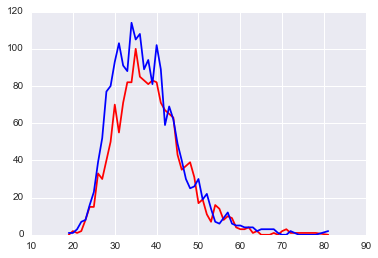

In [6]:
redWinsLength = data.groupby('gamelength').rResult.sum()
blueWinsLength = data.groupby('gamelength').bResult.sum()

plt.plot(redWinsLength.index, redWinsLength, 'r-')
plt.plot(blueWinsLength.index, blueWinsLength, 'b-')

분포도가 주어지면 블루의 승수가 약간씩 뒤로(왼쪽) 밀린 모습을 보임

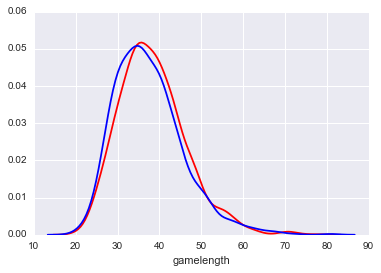

In [7]:
redWins = data[data.rResult == 1]
blueWins = data[data.bResult == 1]

sns.distplot(redWins.gamelength, color='red', hist=False)
sns.distplot(blueWins.gamelength, color='blue', hist=False)

경기별 골드 차이를 통해 블루vs레드 확인

In [8]:
goldData = pd.read_csv('data/goldValues.csv')

# minute를 column name으로 하는 데이터 만들기
minutes = ['min_'+str(x+1) for x in range(81)]
goldData = pd.melt(goldData, id_vars = ['MatchHistory', 'NameType'], value_vars=minutes, var_name='minute', value_name='gold')
# minute variable값을 integer로 변경
goldData.minute = goldData.minute.str.strip('min_').astype(int)
goldData.head()

,MatchHistory,NameType,minute,gold
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,40.0


블루vs레드 gold 차이

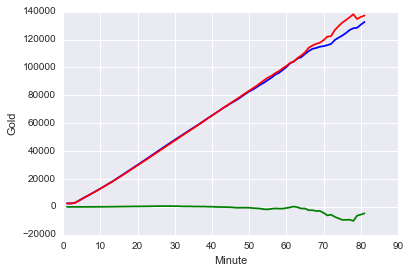

In [12]:
blueGold = goldData[goldData.NameType=='goldblue'].groupby('minute').gold.mean()
redGold = goldData[goldData.NameType=='goldred'].groupby('minute').gold.mean()
goldDiff = goldData[goldData.NameType=='golddiff'].groupby('minute').gold.mean()

plt.plot(blueGold, 'b-')
plt.plot(redGold, 'r-')
plt.plot(goldDiff, 'g-')
plt.xlabel('Minute')
plt.ylabel('Gold')

블루vs레드 각 포지션별 골드 현황

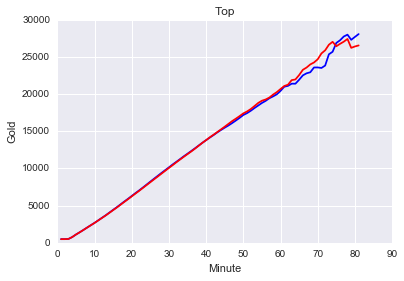

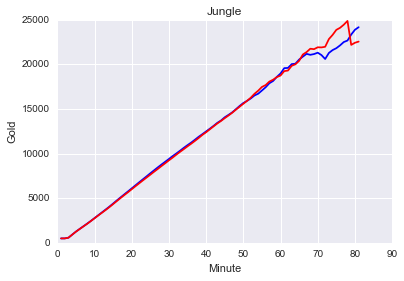

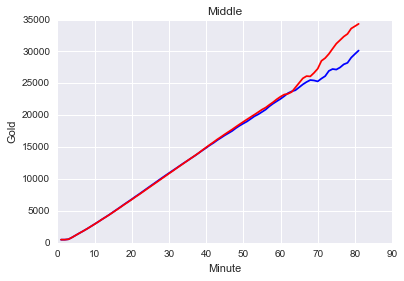

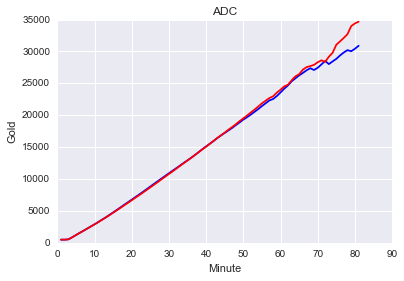

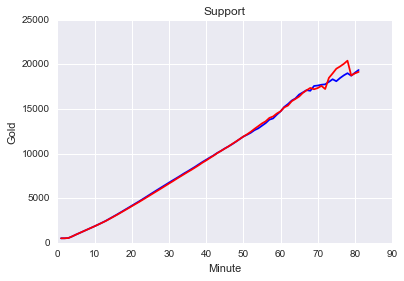

In [13]:
sections = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
num_sections = len(sections)

for i in range(num_sections):
    plt.figure(i)
    plt.plot(goldData[goldData.NameType=='goldblue' + sections[i]].groupby('minute').gold.mean(), 'b-')
    plt.plot(goldData[goldData.NameType=='goldred' + sections[i]].groupby('minute').gold.mean(), 'r-')
    plt.xlabel('Minute')
    plt.ylabel('Gold')
    plt.title(sections[i])

정글에서 골드 현황이 다른 포지션보다 추세가 다르게 보임.

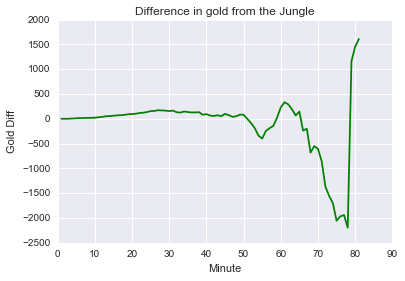

In [19]:
goldJungleDiff = goldData[goldData.NameType == 'goldblueJungle'].groupby('minute').mean() - goldData[goldData.NameType == 'goldredJungle'].groupby('minute').mean()

plt.plot(goldJungleDiff, 'g-')
plt.ylabel('Gold Diff')
plt.xlabel('Minute')
plt.title('Difference in gold from the Jungle')

시간대별로 킬수 확인

In [20]:
killData = pd.read_csv('data/deathValues.csv')
killData.head()

,MatchHistory,TeamColor,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4
0,http://matchhistory.na.leagueoflegends.com/en/...,Blue,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,Blue,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,Blue,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,Blue,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy
4,http://matchhistory.na.leagueoflegends.com/en/...,Blue,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy


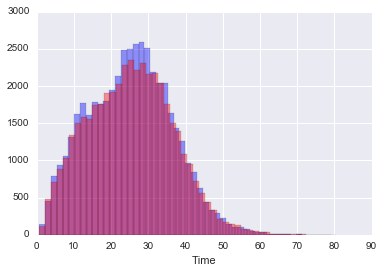

In [21]:
blueDeaths = killData[killData.TeamColor == 'Blue']
redDeaths = killData[killData.TeamColor == 'Red']
blueDeaths = blueDeaths[blueDeaths.Time.notnull()]
redDeaths = redDeaths[redDeaths.Time.notnull()]

sns.distplot(blueDeaths.Time, kde=False, color='blue')
sns.distplot(redDeaths.Time, kde=False, color='red')

블루에서 킬을 내기 쉬운 이유가 나타나진 않지만 블루에서 20~30 사이에 킬을 많이 내는 것으로 보임.

In [26]:
objData = pd.read_csv('data/objValues.csv')
objData.head()

,MatchHistory,ObjType,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,15.217,15.014,33.583,39.269,39.376,16.556,17.856,27.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.018,34.766,23.239,20.058,15.306,25.564,28.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,18.294,36.946,32.833,25.481,29.505,38.445,39.420,25.120,30.158,39.566,37.109,17.34,35.463,15.045,33.135,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,22.879,18.541,19.941,38.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.925,26.963,22.594,34.515,34.213,14.976,33.717,18.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
nums = ['num_' + str(x) for x in range(1, 17)]
objDataMelted = pd.melt(objData, id_vars=['ObjType'], value_vars=nums)
objDataMelted = objDataMelted[objDataMelted.value.notnull()]

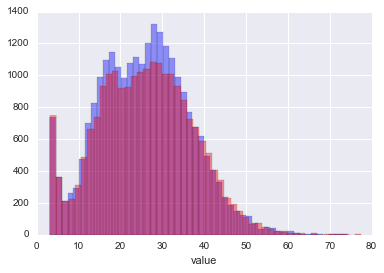

In [28]:
sns.distplot(objDataMelted[objDataMelted.ObjType == 'bTowers'].value, kde=False, color='blue')
sns.distplot(objDataMelted[objDataMelted.ObjType == 'rTowers'].value, kde=False, color='red')

블루팀 타워에서 20~30분 사이에 킬을 많이 가져가는 모습을 볼 수 있음.